## Data Load and data image loader 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set up data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("C:\Users\ASUS\Downloads\xraymodel.csv", target_size=(256, 256), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory("C:\Users\ASUS\Downloads\xraymodel.csv", target_size=(256, 256), batch_size=32, class_mode='binary')

## Define the CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Summary of model

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

## Compile and fit the model

In [2]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=val_generator, validation_steps=len(val_generator))

# evaluate the model
loss, accuracy = model.evaluate(val_generator, steps=len(val_generator))
print('Validation accuracy:', accuracy)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 173s 987ms/step - loss: 0.3730 - accuracy: 0.8351 - val_loss: 0.5966 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 134s 823ms/step - loss: 0.2583 - accuracy: 0.8957 - val_loss: 0.2905 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 136s 832ms/step - loss: 0.2324 - accuracy: 0.9036 - val_loss: 0.3743 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 135s 827ms/step - loss: 0.2181 - accuracy: 0.9122 - val_loss: 0.6616 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 135s 831ms/step - loss: 0.1956 - accuracy: 0.9266 - val_loss: 0.7581 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 136s 831ms/step - loss: 0.1915 - accuracy: 0.9214 - val_loss: 0.5724 - val_accuracy: 0.7500
Epoch 7/10
163/163 [======================

## Model Plot History

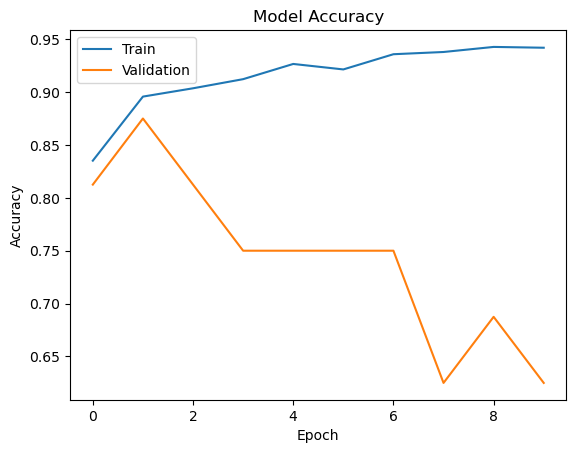

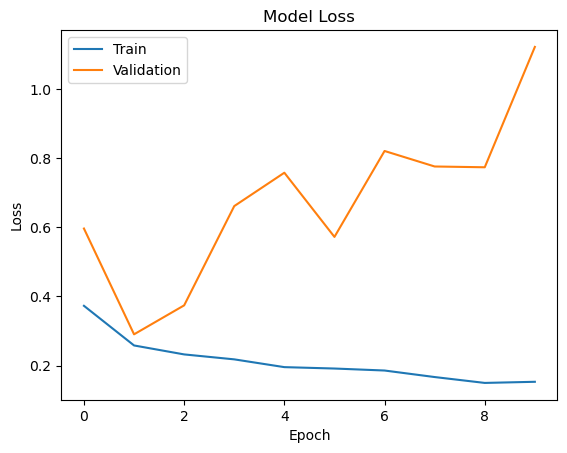

In [4]:
import matplotlib.pyplot as plt

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Test Model

In [5]:
# set up data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/test', target_size=(256, 256), batch_size=32, class_mode='binary')

# evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', accuracy)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 10s 483ms/step - loss: 0.6186 - accuracy: 0.8173
Test accuracy: 0.817307710647583


1/1 [==============================] - 0s 167ms/step


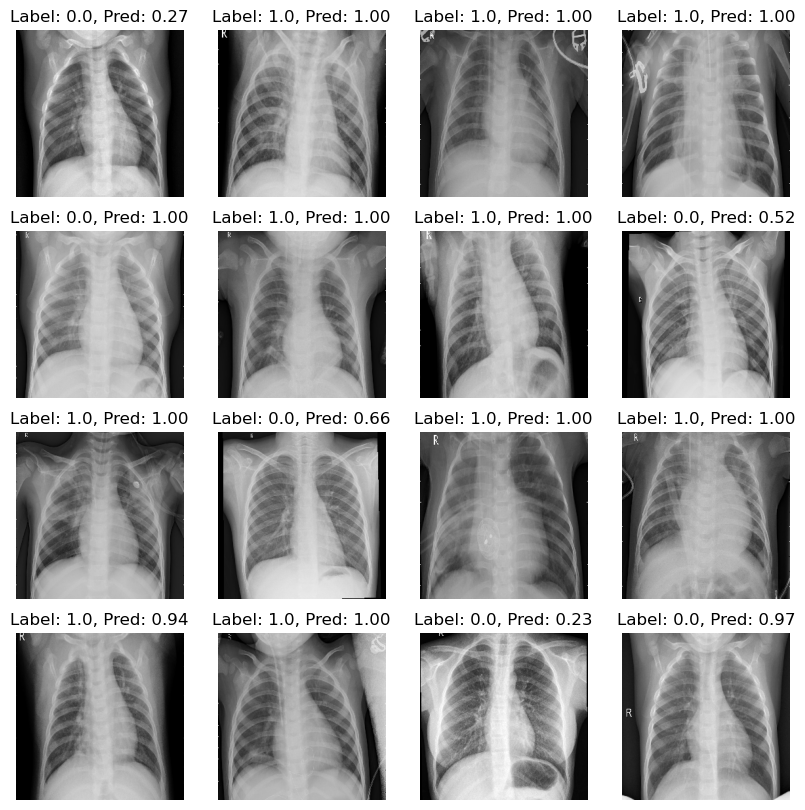

In [6]:
# get a few images from the test set
imgs, labels = next(test_generator)
preds = model.predict(imgs)

# display the images along with the predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    # display the image
    ax.imshow(imgs[i])
    ax.axis('off')
    # display the predicted label
    ax.set_title('Label: {}, Pred: {:.2f}'.format(labels[i], preds[i][0]))
plt.show()